<img src="https://dgg-online.de/WordPress_01/wp-content/uploads/2022/10/20220928_000149_BlueSeis_Setup-scaled.jpg" align="right" alt="BlueSeis Image" width="500" height="100" />

# Analyse BlueSeis BSPF Events

Download Data of BlueSeis at Pinon Flat Observatory via IRIS. 

In [1]:
import os
import obspy as obs
import numpy as np

In [2]:
from functions.request_data import __request_data

In [3]:
# def __request_data(seed, tbeg, tend):

#     from obspy.clients.fdsn import Client

#     client = Client("IRIS")

#     net, sta, loc, cha = seed.split(".")

#     try:
#         inventory = client.get_stations( network=net,
#                                          station=sta,
#                                          starttime=tbeg-60,
#                                          endtime=tend+60,
#                                          level="response",
#                                         )
#     except:
#         print("Failed to load inventory!")


#     try:
#         waveform = client.get_waveforms( network=net,
#                                          station=sta,
#                                          location=loc,
#                                          channel=cha,
#                                          starttime=tbeg-60,
#                                          endtime=tend+60,
#                                         )

#     except:
#         print("Failed to load waveforms!")

#     finally:
#         return waveform, inventory

## Configurations

In [14]:
config = {}

## Event M62
config['tbeg'] = obs.UTCDateTime("2022-11-22 16:38:00")
config['tend'] = obs.UTCDateTime("2022-11-22 16:52:00")

## Event M42
config['tbeg'] = obs.UTCDateTime("2022-12-31 12:12:07")
config['tend'] = obs.UTCDateTime("2022-12-31 12:13:20")

config['tbeg'] = obs.UTCDateTime("2023-04-30T07:20:12")
config['tend'] = obs.UTCDateTime("2023-04-30T07:34:12")


config['seed_blueseis'] = "PY.BSPF.*.HJ*"

if obs.UTCDateTime("2023-04-01") < config['tbeg']:
    config['seed_seismometer'] = "PY.PFOIX.*.HH*"
else:
    # config['seed_seismometer'] = "II.PFO.10.BH*"
    config['seed_seismometer'] = "II.XPFO.30.BH*"


## Load Data

In [15]:
rot, rot_inv = __request_data(config['seed_blueseis'], config['tbeg'], config['tend'])

 -> sensitivity removed!


In [16]:
rot_inv

Inventory created at 2023-10-11T15:46:06.428600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-04-30...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			PY
		Stations (1):
			PY.BSPF (iXblue Blueseis, Pinon Flat Obs., Anza, CA, USA)
		Channels (3):
			PY.BSPF..HJ1, PY.BSPF..HJ2, PY.BSPF..HJ3

3 Trace(s) in Stream:
PY.BSPF..HJZ | 2023-04-30T07:19:12.003300Z - 2023-04-30T07:35:11.998300Z | 200.0 Hz, 192000 samples
PY.BSPF..HJN | 2023-04-30T07:19:12.003300Z - 2023-04-30T07:35:11.998300Z | 200.0 Hz, 192000 samples
PY.BSPF..HJE | 2023-04-30T07:19:12.003300Z - 2023-04-30T07:35:11.998300Z | 200.0 Hz, 192000 samples


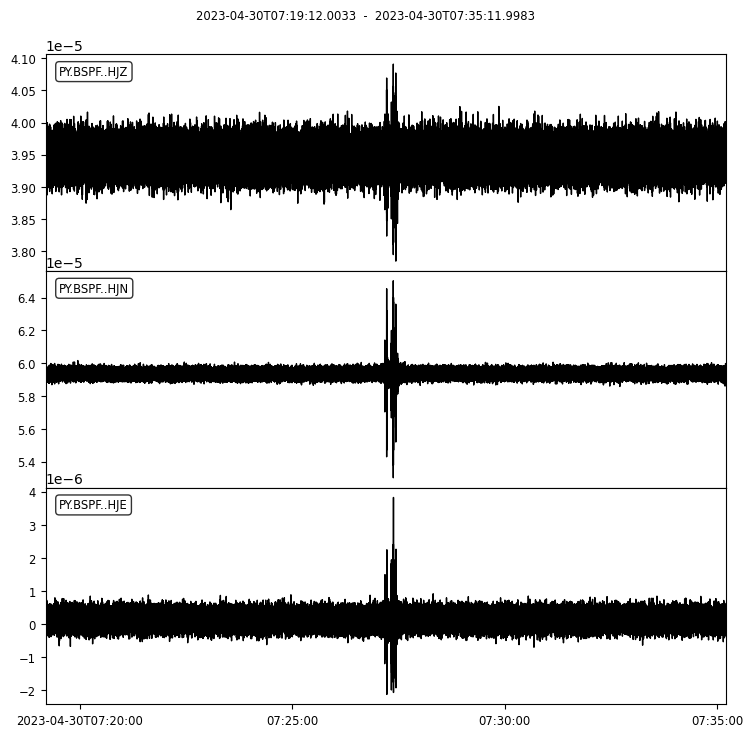

In [17]:
print(rot)
rot.plot(equal_scale=False);

In [18]:
acc, acc_inv = __request_data(config['seed_seismometer'], config['tbeg'], config['tend'])

 -> response removed!


3 Trace(s) in Stream:
PY.PFOIX..HHE | 2023-04-30T07:19:12.000000Z - 2023-04-30T07:35:12.000000Z | 200.0 Hz, 192001 samples
PY.PFOIX..HHN | 2023-04-30T07:19:12.000000Z - 2023-04-30T07:35:12.000000Z | 200.0 Hz, 192001 samples
PY.PFOIX..HHZ | 2023-04-30T07:19:12.000000Z - 2023-04-30T07:35:12.000000Z | 200.0 Hz, 192001 samples


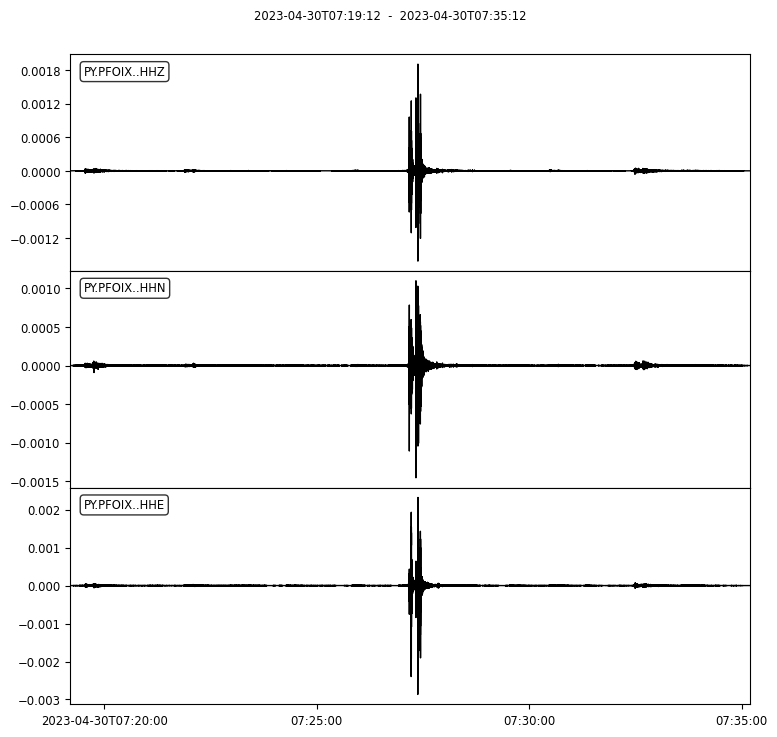

In [19]:
print(acc)
acc.plot(equal_scale=False);

In [20]:
acc_inv

Inventory created at 2023-10-11T15:46:23.706400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-04-30...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			PY
		Stations (1):
			PY.PFOIX (Pinyon Flats Observatory, IXBlue, CA, USA)
		Channels (27):
			PY.PFOIX..ACE, PY.PFOIX..BHZ, PY.PFOIX..BHN, PY.PFOIX..BHE, 
			PY.PFOIX..HHZ, PY.PFOIX..HHN, PY.PFOIX..HHE, PY.PFOIX..LCE, 
			PY.PFOIX..LCQ, PY.PFOIX..LHZ, PY.PFOIX..LHN, PY.PFOIX..LHE, 
			PY.PFOIX..LOG, PY.PFOIX..OCF, PY.PFOIX..VCO, PY.PFOIX..VEA, 
			PY.PFOIX..VEC, PY.PFOIX..VEP, PY.PFOIX..VKI, PY.PFOIX..VM0, 
			PY.PFOIX..VM1, PY.PFOIX..VM2, PY.PFOIX..VM3, PY.PFOIX..VM4, 
			PY.PFOIX..VM5, PY.PFOIX..VM6, PY.PFOIX..VPB

In [21]:
st = obs.Stream()
st+=rot
st+=acc

In [22]:
# st.write("./event62_6C.mseed", format="MSEED")

In [23]:
acc_inv.write(f"{acc[0].stats.station}.xml", format="STATIONXML")
rot_inv.write(f"{rot[0].stats.station}.xml", format="STATIONXML")